In [1]:
import scanpy as sc
import scvelo as scv
import anndata
import numpy as np
import seaborn
import pandas as pd
from scipy import spatial

# Data for table 1

First, we load the `AnnData` for each experiment:  

In [2]:
control = anndata.read_h5ad("../control/processed_objects/control_processed.h5ad")

In [3]:
exp1 = anndata.read_h5ad("../experiment1/processed_objects/anchors_processed.h5ad")

In [4]:
exp1_raw = anndata.read_h5ad("../experiment1/processed_objects/anchors_processed_raw_pca.h5ad")

In [5]:
exp2 = anndata.read_h5ad("../experiment2/processed_objects/anchors_processed.h5ad")

In [6]:
exp2_raw = anndata.read_h5ad("../experiment2/processed_objects/anchors_processed_raw_pca.h5ad")

In [7]:
exp3 = anndata.read_h5ad("../experiment3/processed_objects/anchors_processed.h5ad")

In [8]:
exp3_raw = anndata.read_h5ad("../experiment3/processed_objects/anchors_processed_raw_pca.h5ad")

Now, we retrieve the number of each cell type in each experiment:

In [9]:
control.obs.cell_types.value_counts()

Ductal           916
Ngn3 high EP     642
Pre-endocrine    592
Beta             591
Alpha            481
Ngn3 low EP      262
Epsilon          142
Delta             70
Name: cell_types, dtype: int64

In [10]:
control.obs.cell_types.value_counts(normalize=True)

Ductal           0.247835
Ngn3 high EP     0.173701
Pre-endocrine    0.160173
Beta             0.159903
Alpha            0.130141
Ngn3 low EP      0.070887
Epsilon          0.038420
Delta            0.018939
Name: cell_types, dtype: float64

In [11]:
exp1.obs[exp1.obs.batch == 'b1'].cell_types.value_counts()

Ductal           461
Ngn3 high EP     324
Pre-endocrine    306
Beta             302
Alpha            228
Ngn3 low EP      131
Epsilon           72
Delta             24
Name: cell_types, dtype: int64

In [12]:
exp1.obs[exp1.obs.batch == 'b1'].cell_types.value_counts(normalize=True)

Ductal           0.249459
Ngn3 high EP     0.175325
Pre-endocrine    0.165584
Beta             0.163420
Alpha            0.123377
Ngn3 low EP      0.070887
Epsilon          0.038961
Delta            0.012987
Name: cell_types, dtype: float64

In [13]:
exp1.obs[exp1.obs.batch == 'b2'].cell_types.value_counts()

Ductal           455
Ngn3 high EP     318
Beta             289
Pre-endocrine    286
Alpha            253
Ngn3 low EP      131
Epsilon           70
Delta             46
Name: cell_types, dtype: int64

In [14]:
exp1.obs[exp1.obs.batch == 'b2'].cell_types.value_counts(normalize=True)

Ductal           0.246212
Ngn3 high EP     0.172078
Beta             0.156385
Pre-endocrine    0.154762
Alpha            0.136905
Ngn3 low EP      0.070887
Epsilon          0.037879
Delta            0.024892
Name: cell_types, dtype: float64

In [15]:
exp2.obs[exp2.obs.batch == 'b1'].cell_types.value_counts()

Ductal           595
Pre-endocrine    444
Alpha            385
Beta             325
Ngn3 high EP     289
Ngn3 low EP      183
Epsilon          106
Delta             70
Name: cell_types, dtype: int64

In [16]:
exp2.obs[exp2.obs.batch == 'b1'].cell_types.value_counts(normalize=True)

Ductal           0.248227
Pre-endocrine    0.185232
Alpha            0.160617
Beta             0.135586
Ngn3 high EP     0.120567
Ngn3 low EP      0.076345
Epsilon          0.044222
Delta            0.029203
Name: cell_types, dtype: float64

In [17]:
exp2.obs[exp2.obs.batch == 'b2'].cell_types.value_counts()

Ngn3 high EP     353
Ductal           321
Beta             266
Pre-endocrine    148
Alpha             96
Ngn3 low EP       79
Epsilon           36
Delta              0
Name: cell_types, dtype: int64

In [18]:
exp2.obs[exp2.obs.batch == 'b2'].cell_types.value_counts(normalize=True)

Ngn3 high EP     0.271747
Ductal           0.247113
Beta             0.204773
Pre-endocrine    0.113934
Alpha            0.073903
Ngn3 low EP      0.060816
Epsilon          0.027714
Delta            0.000000
Name: cell_types, dtype: float64

In [19]:
exp3.obs[exp3.obs.batch == 'b1'].cell_types.value_counts()

Pre-endocrine    562
Ductal           412
Alpha            337
Beta             325
Ngn3 high EP     289
Ngn3 low EP      131
Epsilon           71
Delta             28
Name: cell_types, dtype: int64

In [20]:
exp3.obs[exp3.obs.batch == 'b1'].cell_types.value_counts(normalize=True)

Pre-endocrine    0.260789
Ductal           0.191183
Alpha            0.156381
Beta             0.150812
Ngn3 high EP     0.134107
Ngn3 low EP      0.060789
Epsilon          0.032947
Delta            0.012993
Name: cell_types, dtype: float64

In [21]:
exp3.obs[exp3.obs.batch == 'b2'].cell_types.value_counts()

Ductal           504
Ngn3 high EP     353
Beta             266
Alpha            144
Ngn3 low EP      131
Epsilon           71
Delta             42
Pre-endocrine     30
Name: cell_types, dtype: int64

In [22]:
exp3.obs[exp3.obs.batch == 'b2'].cell_types.value_counts(normalize=True)

Ductal           0.327060
Ngn3 high EP     0.229072
Beta             0.172615
Alpha            0.093446
Ngn3 low EP      0.085010
Epsilon          0.046074
Delta            0.027255
Pre-endocrine    0.019468
Name: cell_types, dtype: float64

# Data for table 2

Here, we will calculate the latent time correlation between the control dataset and the rest:

In [23]:
cells = control.obs_names

In [24]:
np.corrcoef(control.obs.loc[cells, 'latent_time'], exp1.obs.loc[cells, 'latent_time'])[0, 1]

0.9847895025238785

In [25]:
np.corrcoef(control.obs.loc[cells, 'latent_time'], exp1_raw.obs.loc[cells, 'latent_time'])[0, 1]

0.9875175493079966

In [26]:
np.corrcoef(control.obs.loc[cells, 'latent_time'], exp2.obs.loc[cells, 'latent_time'])[0, 1]

0.9932831989211347

In [27]:
np.corrcoef(control.obs.loc[cells, 'latent_time'], exp2_raw.obs.loc[cells, 'latent_time'])[0, 1]

0.9846527093286528

In [28]:
np.corrcoef(control.obs.loc[cells, 'latent_time'], exp3.obs.loc[cells, 'latent_time'])[0, 1]

0.9885194502334989

In [29]:
np.corrcoef(control.obs.loc[cells, 'latent_time'], exp3_raw.obs.loc[cells, 'latent_time'])[0, 1]

0.9809164507623338

# Data for figure 3

We should define a function to measure the cosine similarity for the cells of interest:

In [30]:
def get_measure_cell_velocities(adata1, adata2, 
                                measure='correlation',
                                min_corr=0.3, 
                                number_top_genes=100, 
                                number_genes=100):
    
    # Get the n top driver genes for the adata 1
    scv.tl.rank_velocity_genes(adata1, groupby='cell_types',
                               min_corr=min_corr,
                               n_genes=number_genes)
    adata1_driver_genes = scv.DataFrame(adata1.uns['rank_velocity_genes']['names'])
    top_adata1_driver_genes = adata1_driver_genes.head(number_top_genes)
    
    # Get the n top driver genes for the adata 2
    scv.tl.rank_velocity_genes(adata2, groupby='cell_types',
                               min_corr=min_corr,
                               n_genes=number_genes)
    adata2_driver_genes = scv.DataFrame(adata2.uns['rank_velocity_genes']['names'])
    top_adata2_driver_genes = adata2_driver_genes.head(number_top_genes)
    
    # Types of cells
    cell_types = list(top_adata1_driver_genes.columns)
    
    if measure == 'correlation':
        correlations = {}
        for cell_type in cell_types:
            # Extract the drivers shared by the two sets
            cell_type_drivers = list(set(top_adata1_driver_genes[cell_type]).intersection(set(top_adata2_driver_genes[cell_type])))

            # Extract the velocities for these genes
            adata1_vel = adata1.to_df(layer='velocity').loc[adata1.obs[adata1.obs['cell_types'] == cell_type].index, cell_type_drivers]
            adata2_vel = adata2.to_df(layer='velocity').loc[adata2.obs[adata2.obs['cell_types'] == cell_type].index, cell_type_drivers]

            # Extract the vectors for each cells
            corr = []
            for cell in adata1_vel.index:
                cell_adata1 = adata1_vel.loc[cell, :]
                cell_adata2 = adata2_vel.loc[cell, :]


                corr.append(np.corrcoef(cell_adata2, cell_adata1)[1][0])

            correlations[cell_type] = corr

        return correlations
    
    elif measure == 'cosine_similarity':
        cosine_similarities = {}
        for cell_type in cell_types:
            # Extract the drivers shared by the two sets
            cell_type_drivers = list(set(top_adata1_driver_genes[cell_type]).intersection(set(top_adata2_driver_genes[cell_type])))

            # Extract the velocities for these genes
            adata1_vel = adata1.to_df(layer='velocity').loc[adata1.obs[adata1.obs['cell_types'] == cell_type].index, cell_type_drivers]
            adata2_vel = adata2.to_df(layer='velocity').loc[adata2.obs[adata2.obs['cell_types'] == cell_type].index, cell_type_drivers]

            # Extract the vectors for each cells
            cos = []
            for cell in adata1_vel.index:
                cell_adata1 = adata1_vel.loc[cell, :]
                cell_adata2 = adata2_vel.loc[cell, :]


                cos.append(1-spatial.distance.cosine(cell_adata2, cell_adata1))

            cosine_similarities[cell_type] = cos

        return cosine_similarities

And another to summarize the results and get some statistics from them:

In [31]:
def get_mean_measure_cell_type(measure_dict):
    for cell_type in measure_dict:
        print(f"cell_type: {cell_type}")
        print(f"number of cells: {len(measure_dict[cell_type])}")
        print(f"mean : {np.round(np.mean(measure_dict[cell_type]), 3)}")
        print(f"standard deviation: {np.round(np.std(measure_dict[cell_type]), 3)}")
        print(f"range: {np.round(np.min(measure_dict[cell_type]), 3), np.round(np.max(measure_dict[cell_type]), 3)}")
        print("")

Now, we can get the data for the figure:

In [32]:
cos_control_exp1 = get_measure_cell_velocities(control, exp1, measure='cosine_similarity')

ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [33]:
cos_control_exp2 = get_measure_cell_velocities(control, exp2, measure='cosine_similarity')

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [34]:
cos_control_exp3 = get_measure_cell_velocities(control, exp3, measure='cosine_similarity')

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [35]:
get_mean_measure_cell_type(cos_control_exp1)

cell_type: Alpha
number of cells: 481
mean : 0.833
standard deviation: 0.122
range: (0.037, 0.989)

cell_type: Beta
number of cells: 591
mean : 0.945
standard deviation: 0.137
range: (0.145, 0.997)

cell_type: Delta
number of cells: 70
mean : 0.952
standard deviation: 0.051
range: (0.703, 0.98)

cell_type: Ductal
number of cells: 916
mean : 0.893
standard deviation: 0.08
range: (0.363, 0.978)

cell_type: Epsilon
number of cells: 142
mean : 0.801
standard deviation: 0.15
range: (0.256, 0.985)

cell_type: Ngn3 high EP
number of cells: 642
mean : 0.909
standard deviation: 0.109
range: (0.453, 0.999)

cell_type: Ngn3 low EP
number of cells: 262
mean : 0.817
standard deviation: 0.163
range: (0.296, 0.987)

cell_type: Pre-endocrine
number of cells: 592
mean : 0.971
standard deviation: 0.075
range: (-0.145, 0.997)



In [36]:
get_mean_measure_cell_type(cos_control_exp2)

cell_type: Alpha
number of cells: 481
mean : 0.854
standard deviation: 0.133
range: (0.133, 0.98)

cell_type: Beta
number of cells: 591
mean : 0.947
standard deviation: 0.12
range: (0.192, 0.997)

cell_type: Delta
number of cells: 70
mean : 0.997
standard deviation: 0.003
range: (0.972, 0.999)

cell_type: Ductal
number of cells: 916
mean : 0.842
standard deviation: 0.167
range: (-0.103, 0.976)

cell_type: Epsilon
number of cells: 142
mean : 0.933
standard deviation: 0.07
range: (0.67, 0.992)

cell_type: Ngn3 high EP
number of cells: 642
mean : 0.924
standard deviation: 0.095
range: (0.541, 0.998)

cell_type: Ngn3 low EP
number of cells: 262
mean : 0.734
standard deviation: 0.23
range: (-0.019, 0.991)

cell_type: Pre-endocrine
number of cells: 592
mean : 0.98
standard deviation: 0.107
range: (-0.73, 0.998)



In [37]:
get_mean_measure_cell_type(cos_control_exp3)

cell_type: Alpha
number of cells: 481
mean : 0.858
standard deviation: 0.087
range: (0.387, 0.979)

cell_type: Beta
number of cells: 591
mean : 0.937
standard deviation: 0.133
range: (0.189, 0.998)

cell_type: Delta
number of cells: 70
mean : 0.983
standard deviation: 0.01
range: (0.964, 0.995)

cell_type: Ductal
number of cells: 916
mean : 0.861
standard deviation: 0.127
range: (0.188, 0.978)

cell_type: Epsilon
number of cells: 142
mean : 0.798
standard deviation: 0.107
range: (0.447, 0.958)

cell_type: Ngn3 high EP
number of cells: 642
mean : 0.962
standard deviation: 0.032
range: (0.738, 0.996)

cell_type: Ngn3 low EP
number of cells: 262
mean : 0.744
standard deviation: 0.191
range: (-0.02, 0.987)

cell_type: Pre-endocrine
number of cells: 592
mean : 0.967
standard deviation: 0.13
range: (-0.433, 0.996)



# Data for figure 4

Let's retrieve the data for the figure 4. We need the mean cosine similarity, but this time using the RNA velocity estimated using the principal components from unintegrated data: 

In [38]:
cos_control_exp1_raw = get_measure_cell_velocities(control, exp1_raw, measure='cosine_similarity')

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [39]:
cos_control_exp2_raw = get_measure_cell_velocities(control, exp2_raw, measure='cosine_similarity')

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [40]:
cos_control_exp3_raw = get_measure_cell_velocities(control, exp3_raw, measure='cosine_similarity')

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)
ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


Now, we can calculate the difference in mean between the cosine similarity calculated above and the current one. We will define a function to do the job:

In [41]:
get_mean_measure_cell_type(cos_control_exp1_raw)

cell_type: Alpha
number of cells: 481
mean : 0.806
standard deviation: 0.159
range: (-0.156, 0.982)

cell_type: Beta
number of cells: 591
mean : 0.87
standard deviation: 0.221
range: (0.033, 0.998)

cell_type: Delta
number of cells: 70
mean : 0.939
standard deviation: 0.081
range: (0.593, 0.985)

cell_type: Ductal
number of cells: 916
mean : 0.77
standard deviation: 0.221
range: (-0.235, 0.987)

cell_type: Epsilon
number of cells: 142
mean : 0.814
standard deviation: 0.118
range: (0.32, 0.976)

cell_type: Ngn3 high EP
number of cells: 642
mean : 0.976
standard deviation: 0.024
range: (0.781, 0.998)

cell_type: Ngn3 low EP
number of cells: 262
mean : 0.645
standard deviation: 0.252
range: (-0.002, 0.98)

cell_type: Pre-endocrine
number of cells: 592
mean : 0.894
standard deviation: 0.079
range: (0.197, 0.966)



In [42]:
get_mean_measure_cell_type(cos_control_exp2_raw)

cell_type: Alpha
number of cells: 481
mean : 0.809
standard deviation: 0.136
range: (0.284, 0.978)

cell_type: Beta
number of cells: 591
mean : 0.904
standard deviation: 0.202
range: (0.157, 0.997)

cell_type: Delta
number of cells: 70
mean : 0.996
standard deviation: 0.007
range: (0.94, 0.999)

cell_type: Ductal
number of cells: 916
mean : 0.797
standard deviation: 0.2
range: (-0.264, 0.978)

cell_type: Epsilon
number of cells: 142
mean : 0.886
standard deviation: 0.121
range: (0.41, 0.987)

cell_type: Ngn3 high EP
number of cells: 642
mean : 0.873
standard deviation: 0.133
range: (0.317, 0.996)

cell_type: Ngn3 low EP
number of cells: 262
mean : 0.688
standard deviation: 0.241
range: (-0.121, 0.99)

cell_type: Pre-endocrine
number of cells: 592
mean : 0.969
standard deviation: 0.162
range: (-0.732, 0.998)



In [43]:
get_mean_measure_cell_type(cos_control_exp3_raw)

cell_type: Alpha
number of cells: 481
mean : 0.792
standard deviation: 0.207
range: (-0.033, 0.985)

cell_type: Beta
number of cells: 591
mean : 0.92
standard deviation: 0.183
range: (0.198, 0.999)

cell_type: Delta
number of cells: 70
mean : 0.997
standard deviation: 0.003
range: (0.977, 0.999)

cell_type: Ductal
number of cells: 916
mean : 0.86
standard deviation: 0.108
range: (0.319, 0.982)

cell_type: Epsilon
number of cells: 142
mean : 0.797
standard deviation: 0.172
range: (0.119, 0.986)

cell_type: Ngn3 high EP
number of cells: 642
mean : 0.871
standard deviation: 0.135
range: (0.291, 0.997)

cell_type: Ngn3 low EP
number of cells: 262
mean : 0.746
standard deviation: 0.187
range: (0.19, 0.986)

cell_type: Pre-endocrine
number of cells: 592
mean : 0.945
standard deviation: 0.047
range: (0.539, 0.987)



We can generate the plot of the velocity vector field displayed as streamlines over a heatmap of the latent time:

saving figure to file ../figures/exp3_vel_lat_time.pdf


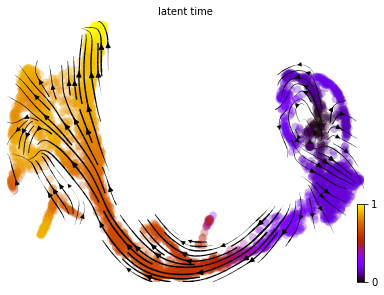

In [44]:
scv.pl.velocity_embedding_stream(exp3, basis='umap', 
                                 color="latent_time", 
                                 color_map='gnuplot',
                                 save='../figures/exp3_vel_lat_time.pdf')

saving figure to file ../figures/exp3_raw_vel_lat_time.pdf


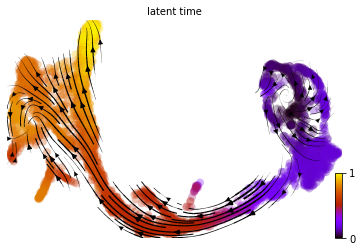

In [45]:
scv.pl.velocity_embedding_stream(exp3_raw, 
                                 basis='umap', 
                                 color="latent_time", 
                                 color_map='gnuplot',
                                 save='../figures/exp3_raw_vel_lat_time.pdf')

# Velocities UMAP

Finally, we will visualize through UMAP the cells using their velocity values and group them by batch. We will define a function and apply it to all our datasets:

In [63]:
def create_umap_velocities(adata, control=False, min_dist=0.3):
    velocity_df = adata.to_df(layer='velocity')
    velocity_df = velocity_df.dropna(axis = 1)
    velocity_adata = sc.AnnData(velocity_df)
    if not control:
        velocity_adata.obs['batch'] = adata.obs['batch']
    velocity_adata.obs['cell_types'] = adata.obs['cell_types']
    sc.tl.pca(velocity_adata, svd_solver='arpack')
    sc.pp.neighbors(velocity_adata)
    sc.tl.umap(velocity_adata, min_dist=min_dist)
    return velocity_adata

In [47]:
sc.set_figure_params(dpi=200)

In [48]:
control_vel_umap = create_umap_velocities(control, control=True)

In [49]:
exp1_vel_umap = create_umap_velocities(exp1, min_dist=0.45)

In [50]:
exp1_raw_vel_umap = create_umap_velocities(exp1_raw)

In [51]:
exp2_vel_umap = create_umap_velocities(exp2)

In [52]:
exp2_raw_vel_umap = create_umap_velocities(exp2_raw, min_dist=0.4)

In [53]:
exp3_vel_umap = create_umap_velocities(exp3, min_dist=0.4)

In [54]:
exp3_raw_vel_umap = create_umap_velocities(exp3_raw)

In [55]:
sc.settings.figdir = "../figures"

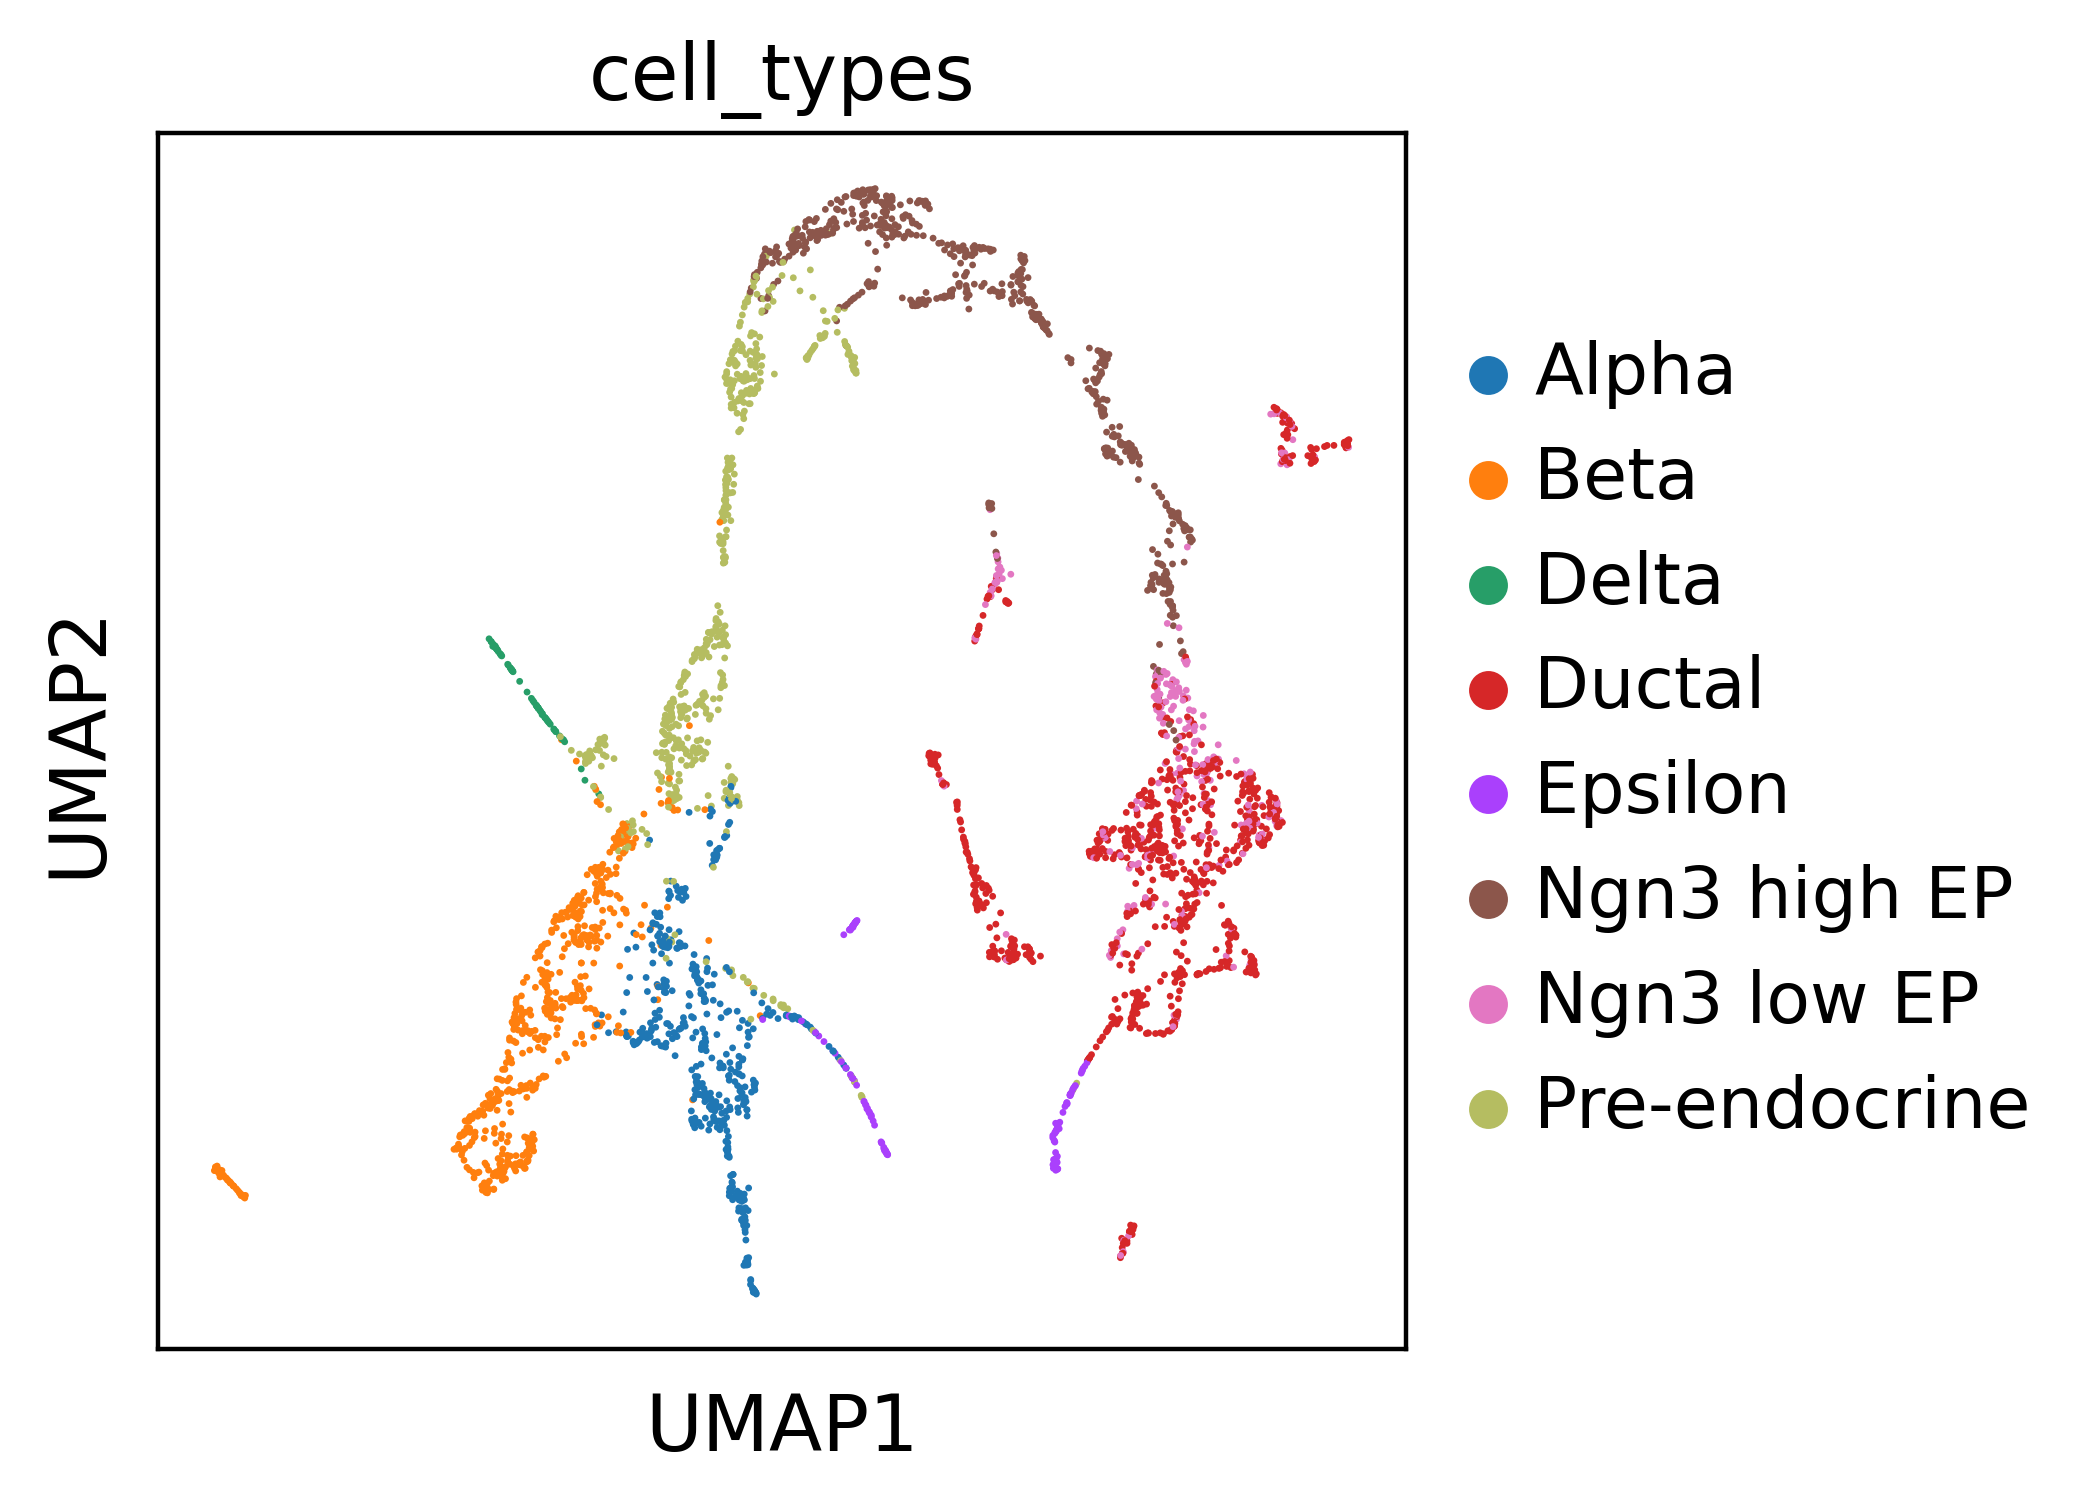

In [56]:
sc.pl.umap(control_vel_umap, color = "cell_types", size = 6)

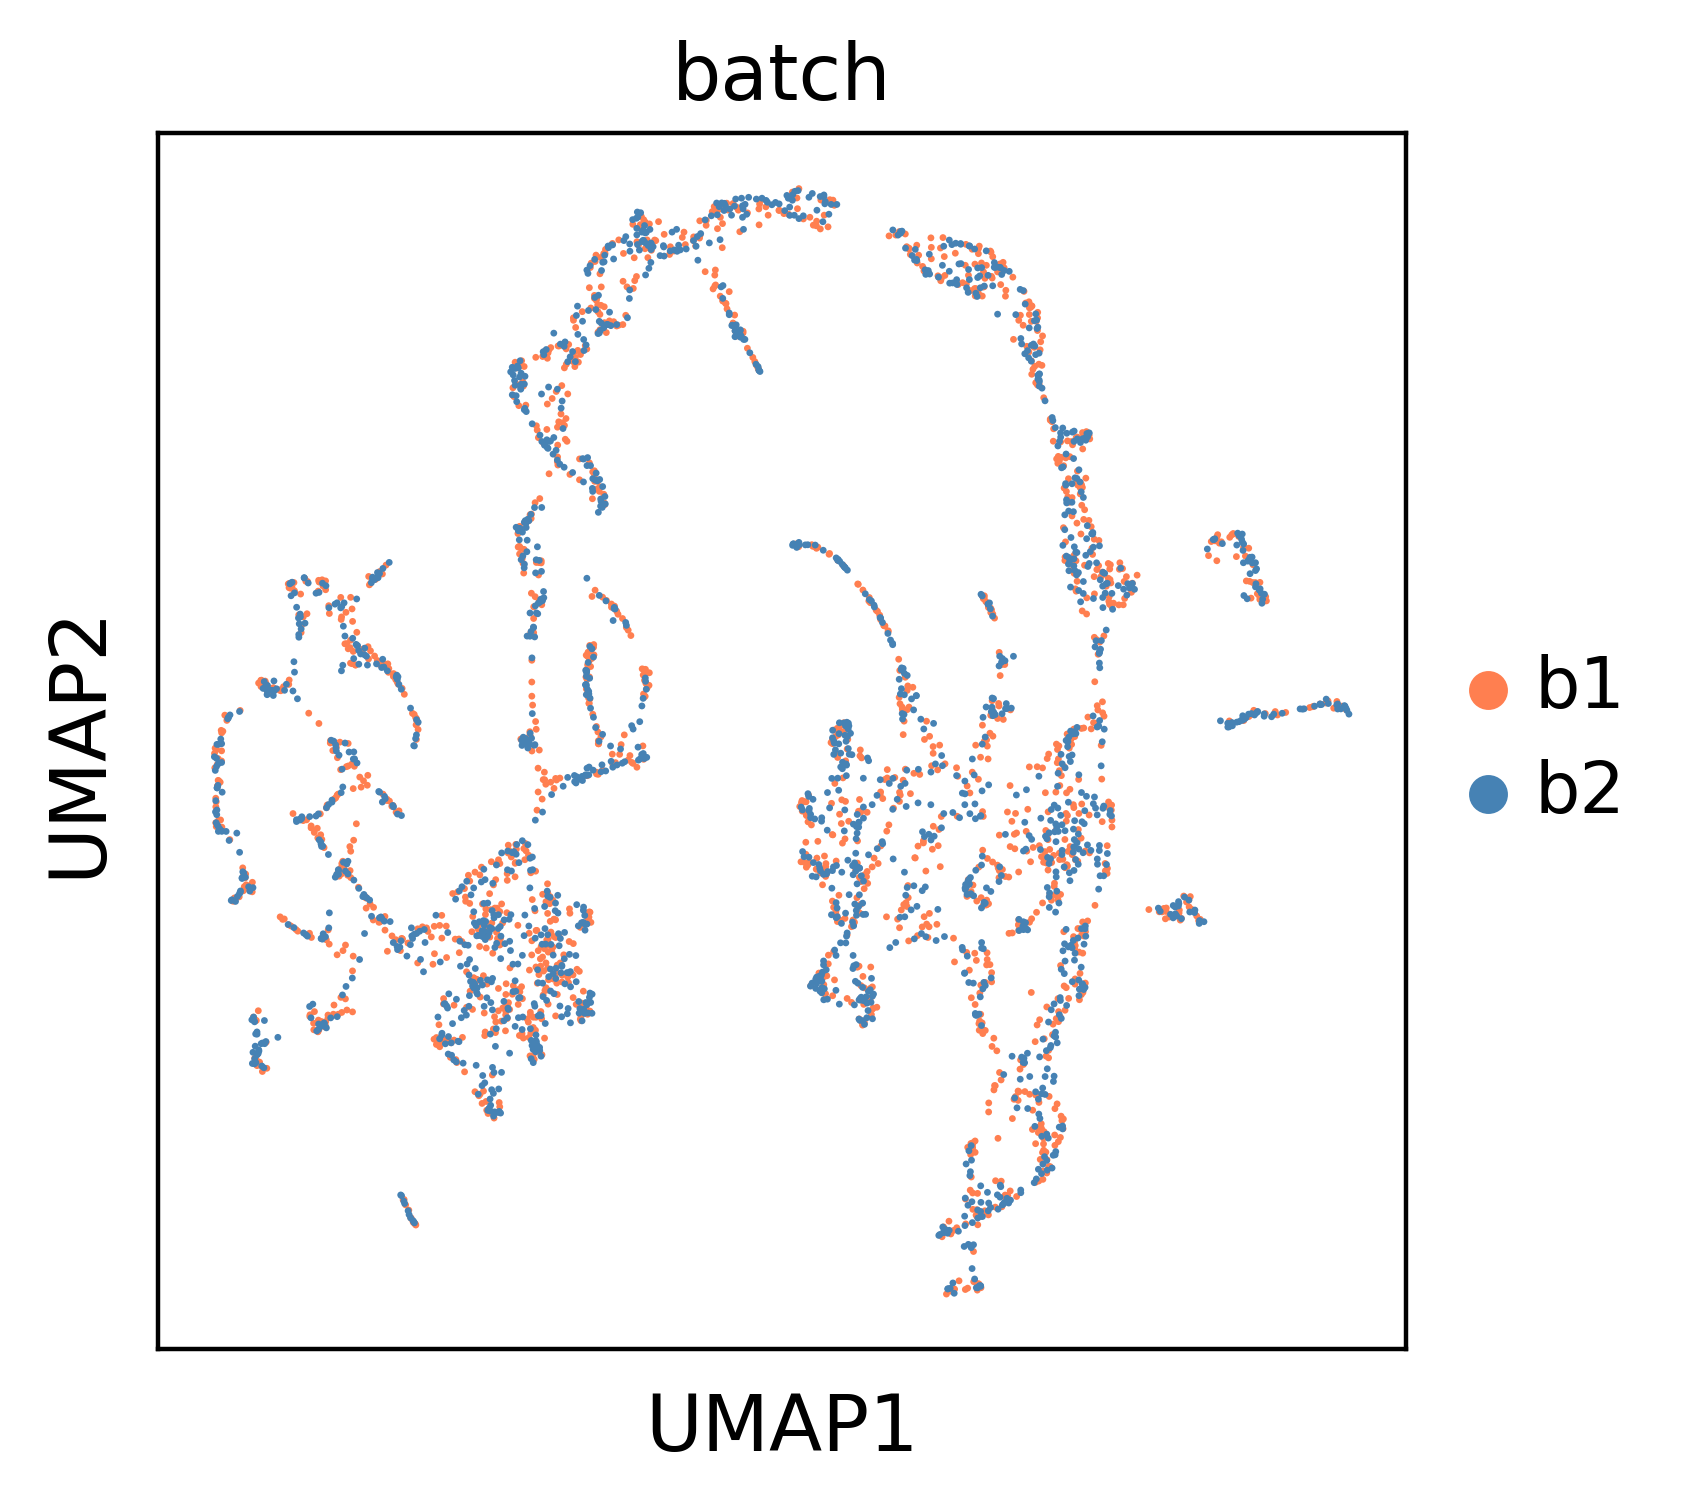

In [123]:
sc.pl.umap(exp1_vel_umap, color = "batch", size = 6, save="_exp1_vel.pdf", palette=['coral', 'steelblue'])

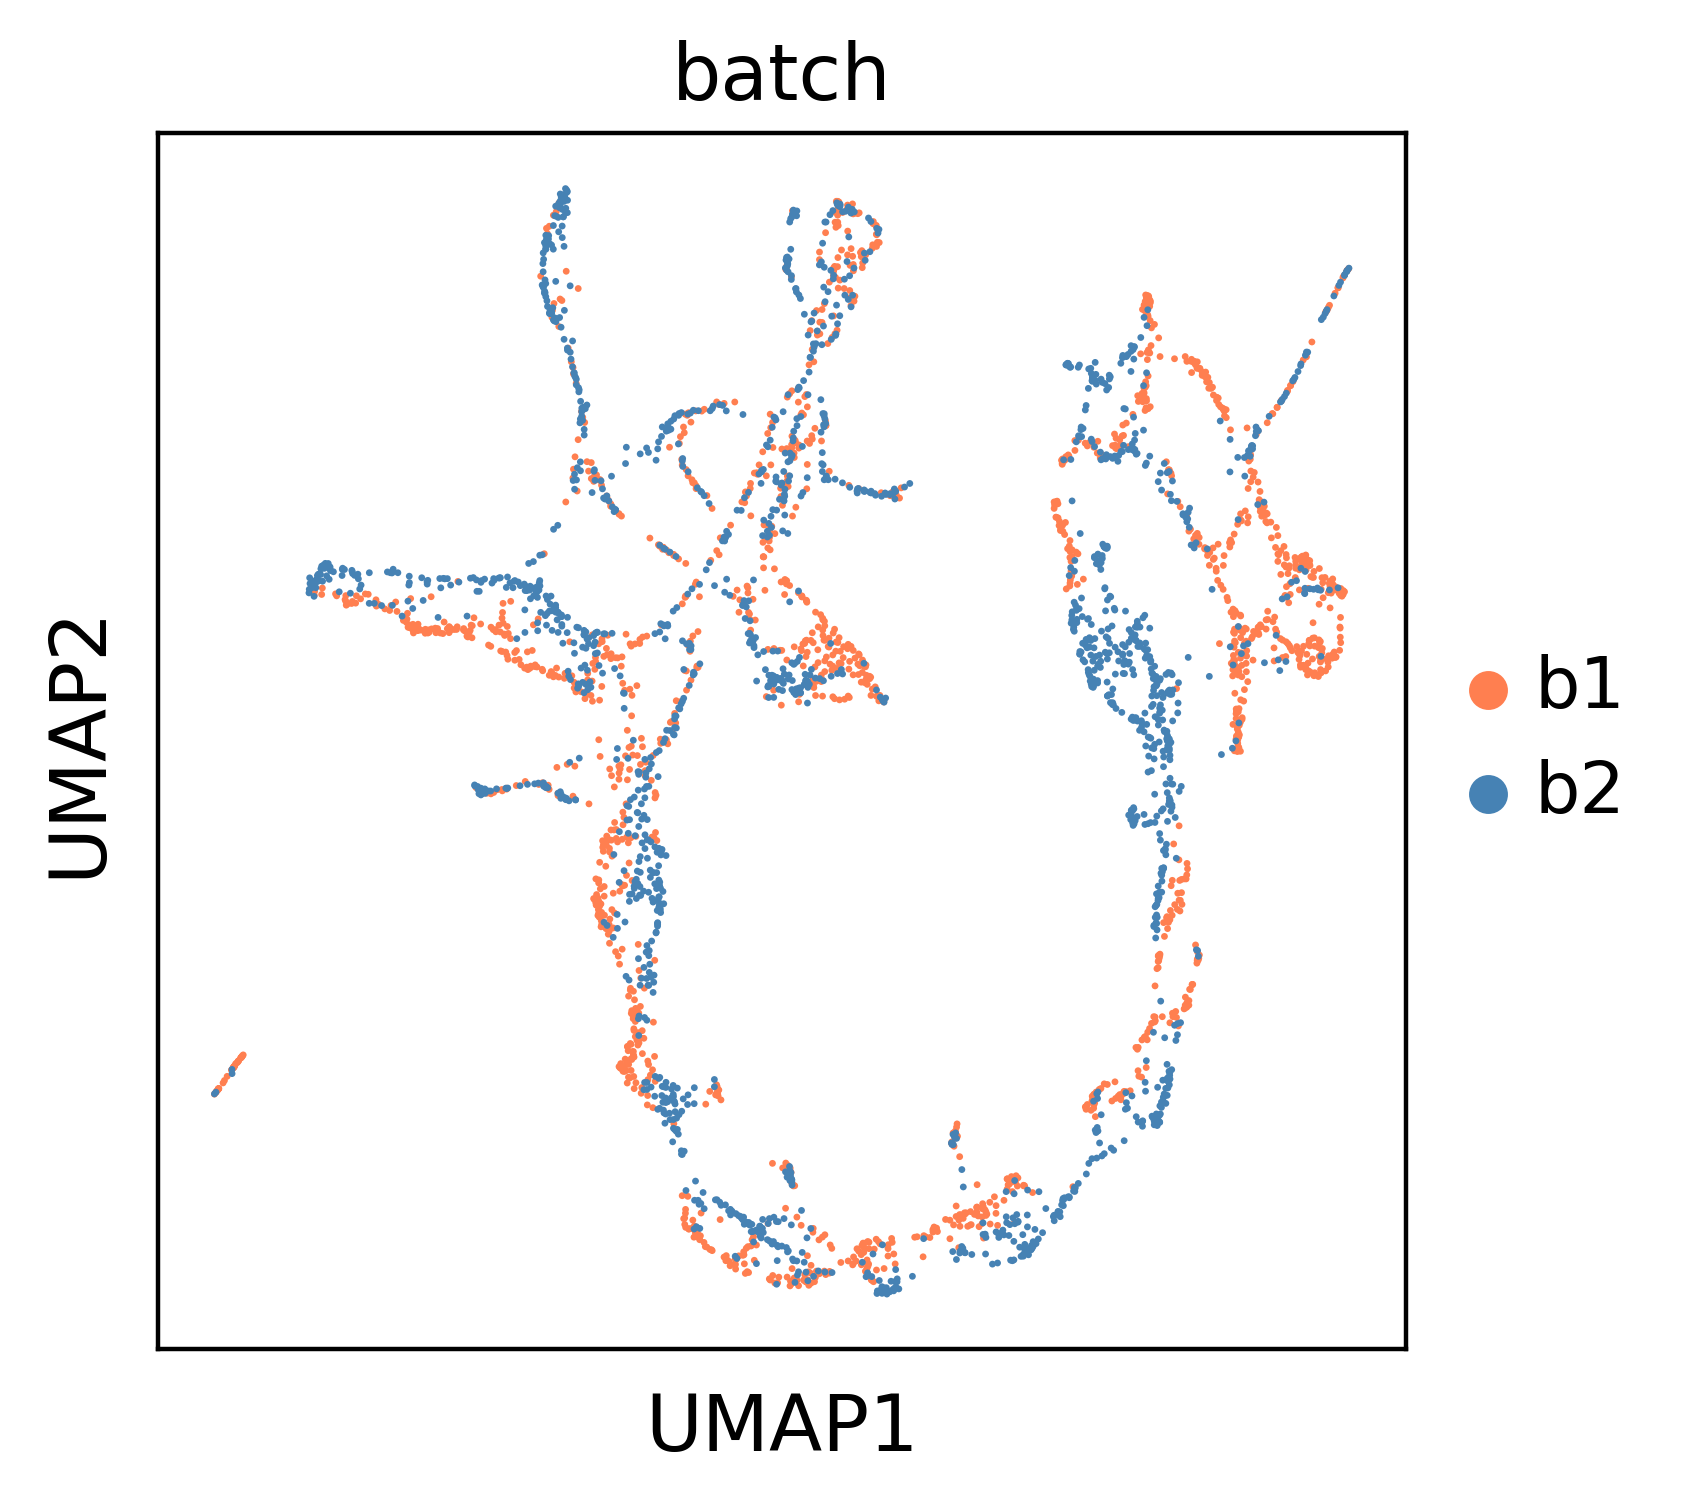

In [58]:
sc.pl.umap(exp1_raw_vel_umap, color = "batch", size = 6, save="_exp1_raw_vel.pdf", palette=['coral', 'steelblue'])

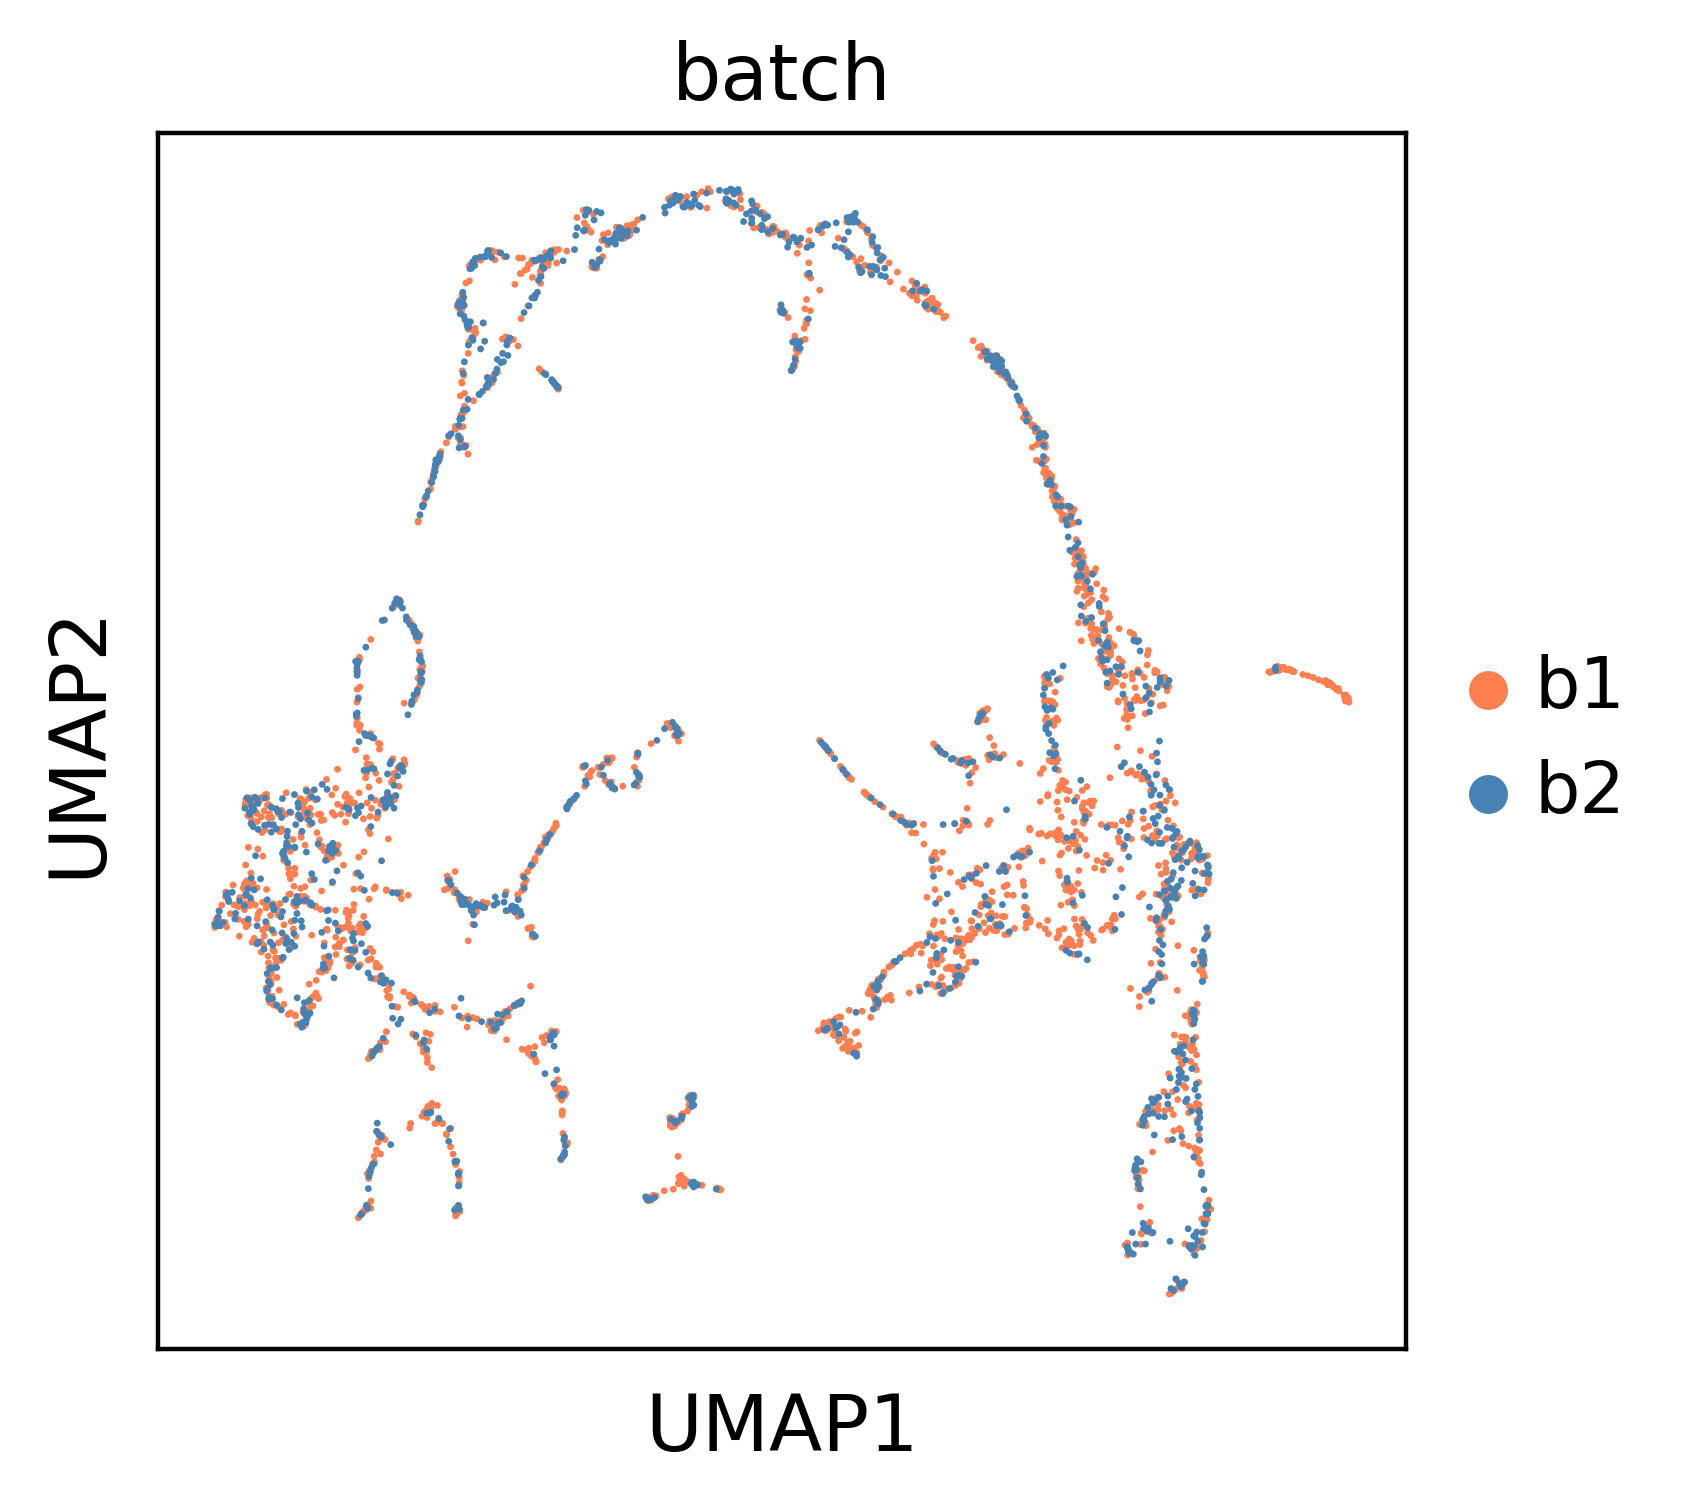

In [59]:
sc.pl.umap(exp2_vel_umap, color = "batch", size = 6, save="_exp2_vel.pdf", palette=['coral', 'steelblue'])

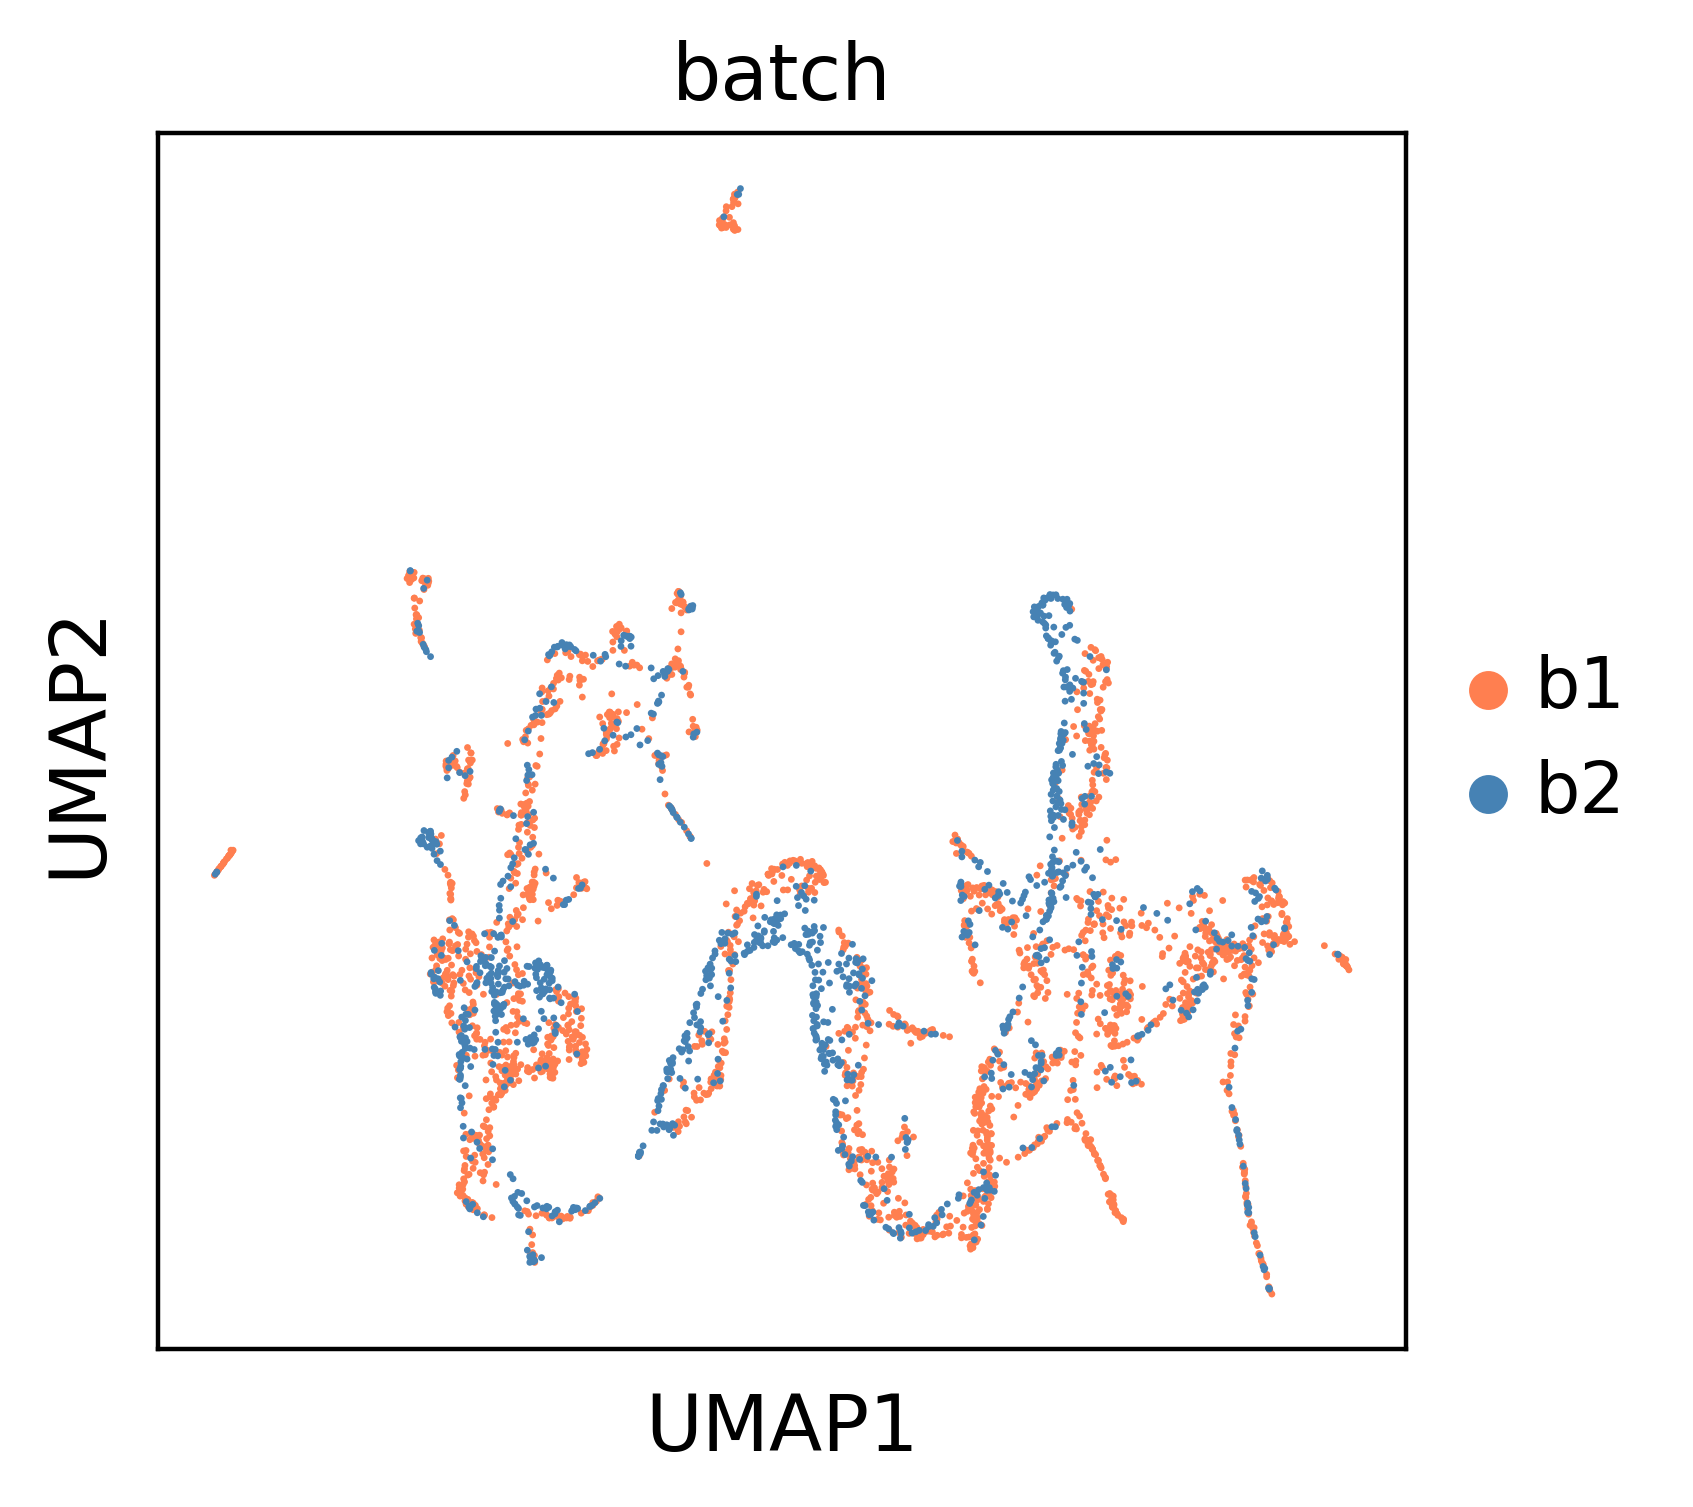

In [140]:
sc.pl.umap(exp2_raw_vel_umap, color = "batch", size = 6, save="_exp2_raw_vel.pdf", palette=['coral', 'steelblue'])

In [141]:
exp3_vel_umap = create_umap_velocities(exp3, min_dist=0.4)

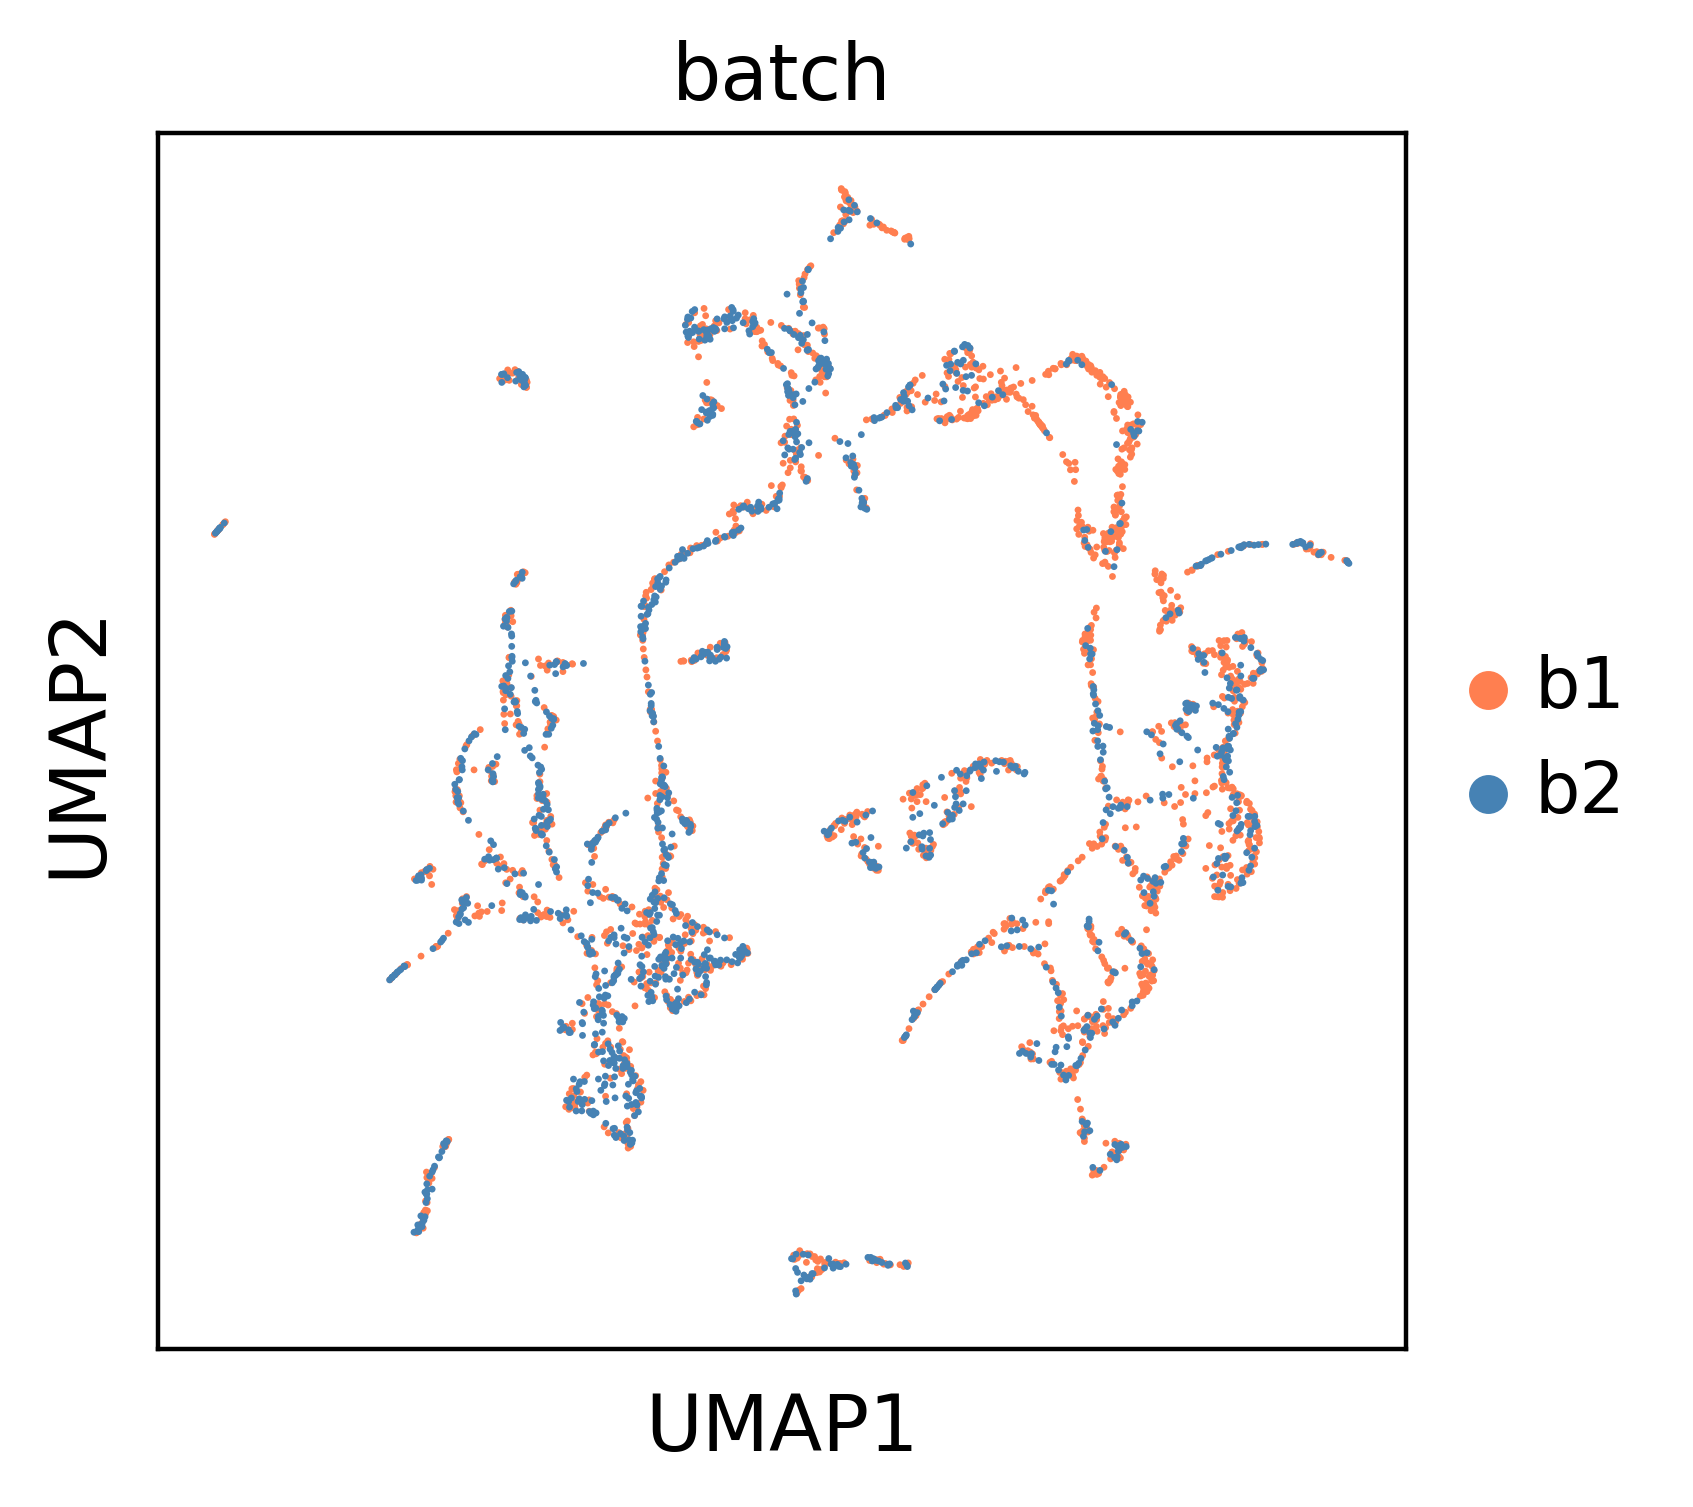

In [142]:
sc.pl.umap(exp3_vel_umap, color = "batch", size = 6, save="_exp3_vel.pdf", palette=['coral', 'steelblue'])

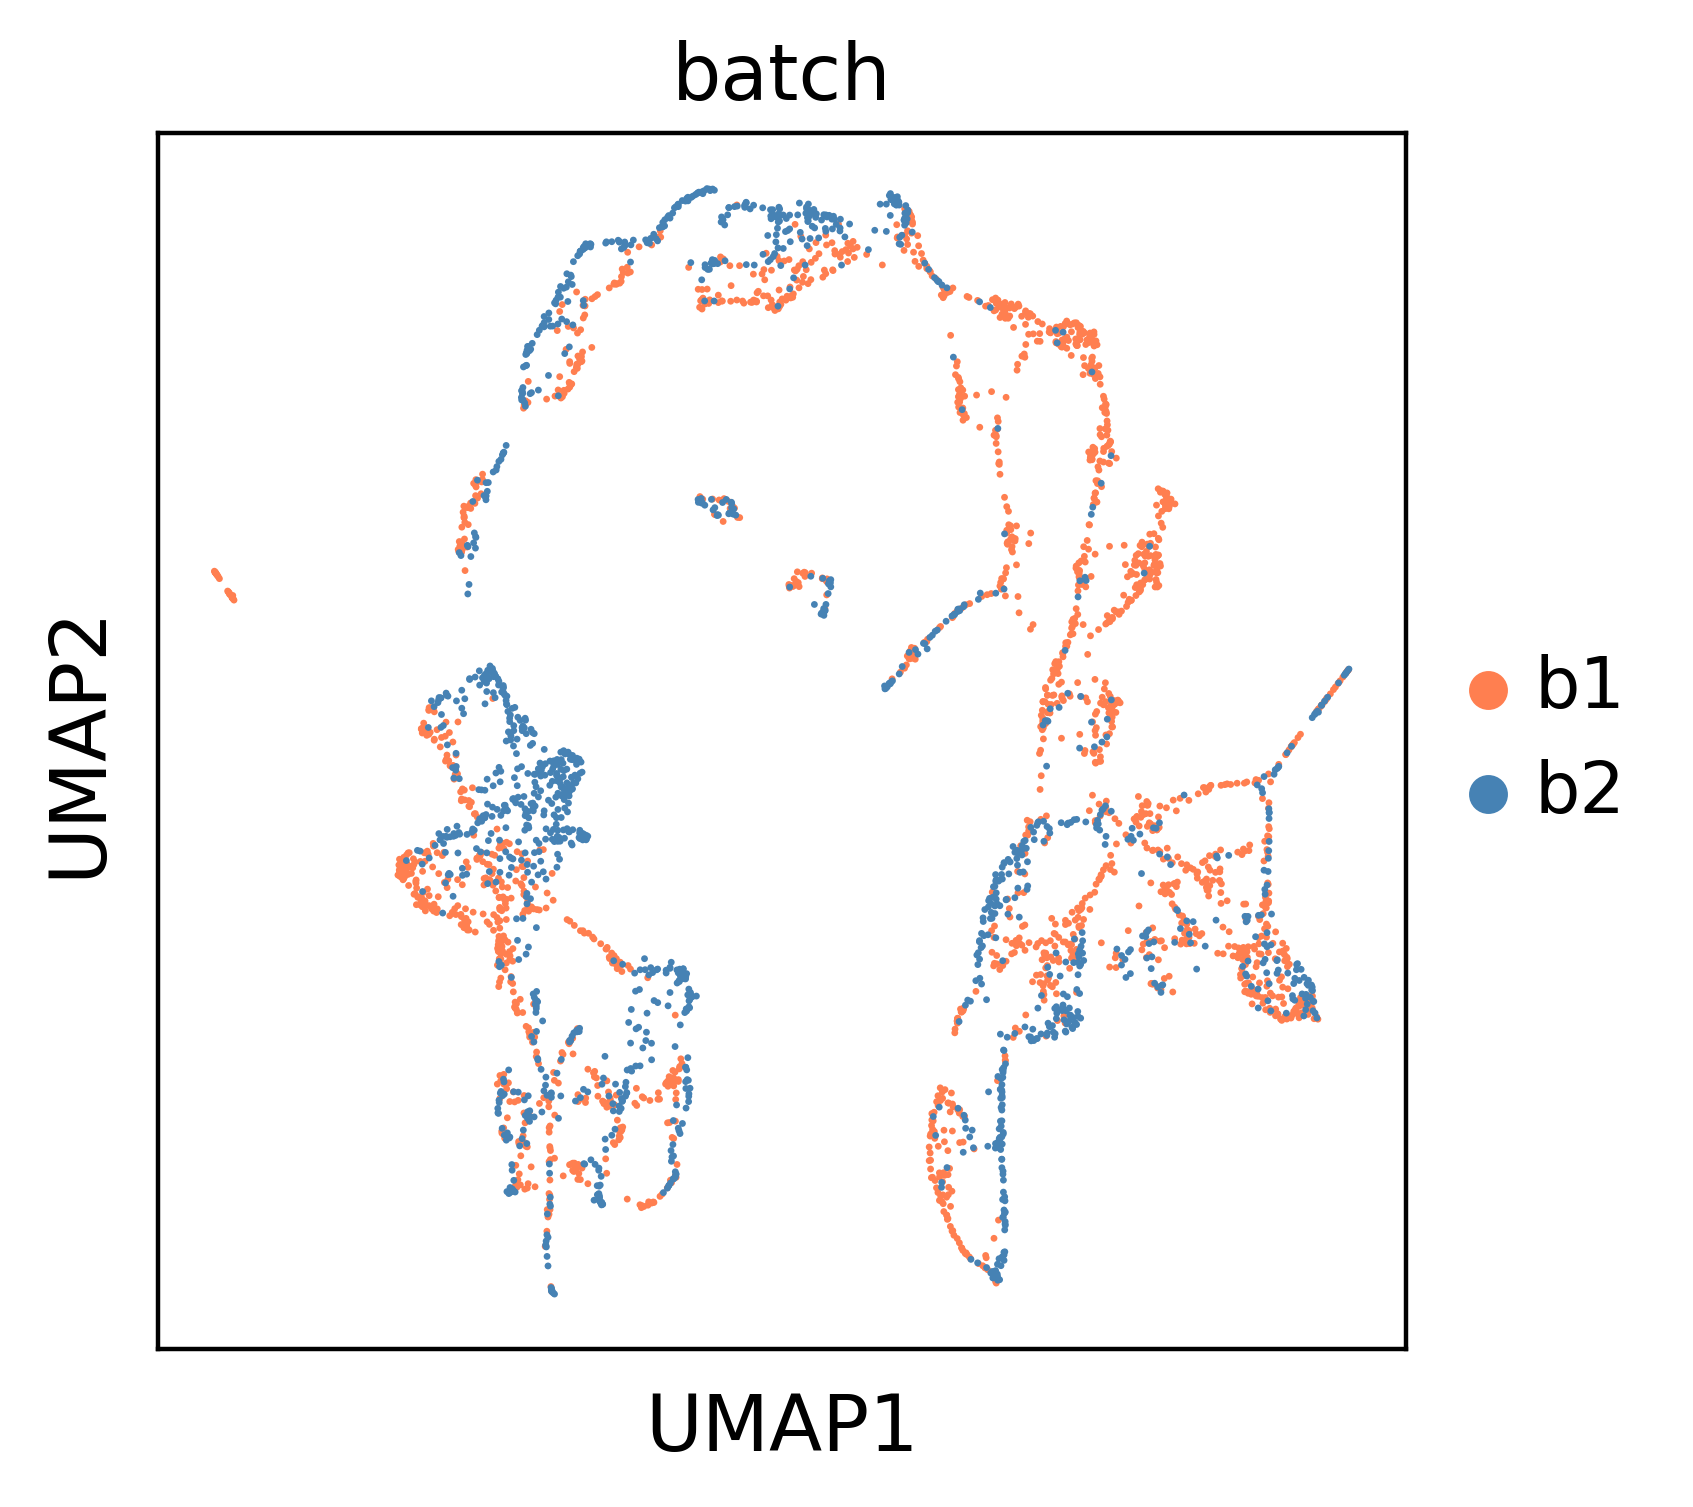

In [62]:
sc.pl.umap(exp3_raw_vel_umap, color = "batch", size = 6, save="_exp3_raw_vel.pdf", palette=['coral', 'steelblue'])